In [1]:
import pandas as pd
import numpy  as np

from pygeodyn.pygeodyn_plot_scalingfactors import *
import os


# Proccess data


In [2]:
# month_list = ['oct', 'nov', 'dec']
month_list = ['oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr']#,

run_list = ['msis2',
            'jb2008',
            'dtm2020_o',
            'hasdm_oc',
           ]
    
gfo_acc_file = 'gfo_acc_6month.csv'
gfo_pod_file = 'gfo_pod_6month.csv'
# gfo_pod_file = 'gfo_pod_nov.csv'
ice_pod_file = 'icesat2_6month.csv'
scale_cadence=3

## GFO Acc

In [3]:
if os.path.exists(gfo_acc_file) :
    print(gfo_acc_file, ' exists' )

elif os.path.exists(gfo_acc_file+'.bz2') :
    
    print('must bunzip')
    os.system('bunzip2 -v '+ gfo_acc_file+'.bz2')
# gfo_6month.csv.bz2
else:
    print(f"Need to construct Dataset: {gfo_acc_file}")

if os.path.exists(gfo_acc_file) :
    print(gfo_acc_file, ' exists' )
    
    
    gfo_acc_df = pd.read_csv(gfo_acc_file, 
                    sep = ',',
                    )

    os.system('bzip2 -v '+ gfo_acc_file)

    
else:
    print(f"---Calculating Grace-FO normalization")
    D500_gfo = normalize_density_msis2( gfo_acc_df , 'GRACE-FO Acc', 500)
    gfo_acc_df['D500_gfo'] = D500_gfo
    #### save to a csv
    gfo_acc_df.to_csv(gfo_acc_file, index=False)  

    

# gfo_df2 =     gfo_df.query("Date >= '2018-10-14' and Date < '2018-12-30'")
# del gfo_df
    

must bunzip


  gfo_acc_6month.csv.bz2: done


gfo_acc_6month.csv  exists


  gfo_acc_6month.csv:  3.287:1,  2.434 bits/byte, 69.58% saved, 176047371 in, 53552927 out.


## GFO pod

In [4]:
if os.path.exists(gfo_pod_file):
    print(gfo_pod_file, ' exists' )

    
elif os.path.exists(gfo_pod_file+'.bz2') :
    
    print('must bunzip')
    os.system('bunzip2 -v '+ gfo_pod_file+'.bz2')
    
else:
    print(f"Need to construct Dataset: {gfo_pod_file}")

if os.path.exists(gfo_pod_file) :
    print(gfo_pod_file, ' exists' )
    
    gfo_pod_df = pd.read_csv(gfo_pod_file, 
                    sep = ',',
                    )

    os.system('bzip2 -v '+ gfo_pod_file)

else:
    
    print(f"Need to normalize Dataset: {gfo_pod_file}")



  gfo_pod_6month.csv.bz2: 

must bunzip


done


gfo_pod_6month.csv  exists


  gfo_pod_6month.csv:  3.070:1,  2.606 bits/byte, 67.43% saved, 195717731 in, 63746614 out.


## ICE pod

In [5]:
if os.path.exists(ice_pod_file):
    print(ice_pod_file, ' exists' )

    
elif os.path.exists(ice_pod_file+'.bz2') :
    
    print('must bunzip')
    os.system('bunzip2 -v '+ ice_pod_file+'.bz2')
    
else:
    print(f"Need to construct Dataset: {ice_pod_file}")

    
    
if os.path.exists(ice_pod_file) :
    print(ice_pod_file, ' exists' )
    
    ice_pod_df = pd.read_csv(ice_pod_file, sep = ',')
    
    os.system('bzip2 -v '+ ice_pod_file)

else:
    
    print(f"Need to Normalize Dataset: {ice_pod_file}")



  icesat2_6month.csv.bz2: 

must bunzip


done


icesat2_6month.csv  exists


  icesat2_6month.csv:  3.064:1,  2.611 bits/byte, 67.36% saved, 220322515 in, 71905222 out.


In [6]:
def orbit_avg_generic(Dates, rho, Lats ):
    lat     = np.asarray(Lats[:])
    time_pd = pd.to_datetime(Dates[:])

    # identify ascending equatorial pass as start of orbit
    a     = np.logical_and( lat[1:]*lat[0:-1]  < 0 , lat[1:] > lat[0:-1] )
    tup_i = a.ravel().nonzero( )
    i     = np.squeeze(tup_i)
    
    # initialize arrays
    d_avg      = np.zeros(np.size(i))
    stddev     = np.zeros(np.size(i))
    time_avg   = []  
    for j in range(np.size(i)-1):
        # average density over orbital passes
        d_avg[j]      = np.mean(rho[i[j] : i[j+1]-1  ]  )

        ## Std Deviation
        stddev[j]      = np.std(rho[i[j] : i[j+1]-1  ]  )

        # average dates
        # t1 = pd.to_datetime(time_pd[ i[j]    ])
        # t2 = pd.to_datetime(time_pd[ i[j+1]-1])
        t1 = pd.to_datetime(time_pd.values[ i[j]    ])
        t2 = pd.to_datetime(time_pd.values[ i[j+1]-1])
        datemiddle = pd.Timestamp(t1) + (pd.Timestamp(t2) - pd.Timestamp(t1)) / 2
        time_avg.append(datemiddle)
        
    return(time_avg, d_avg , stddev)




# Pick Dates

In [7]:
import plotly.graph_objects as go

import numpy as np

icepodcolor = "#1f77b4"



/data/miniconda3/envs/pygeodyn2/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log



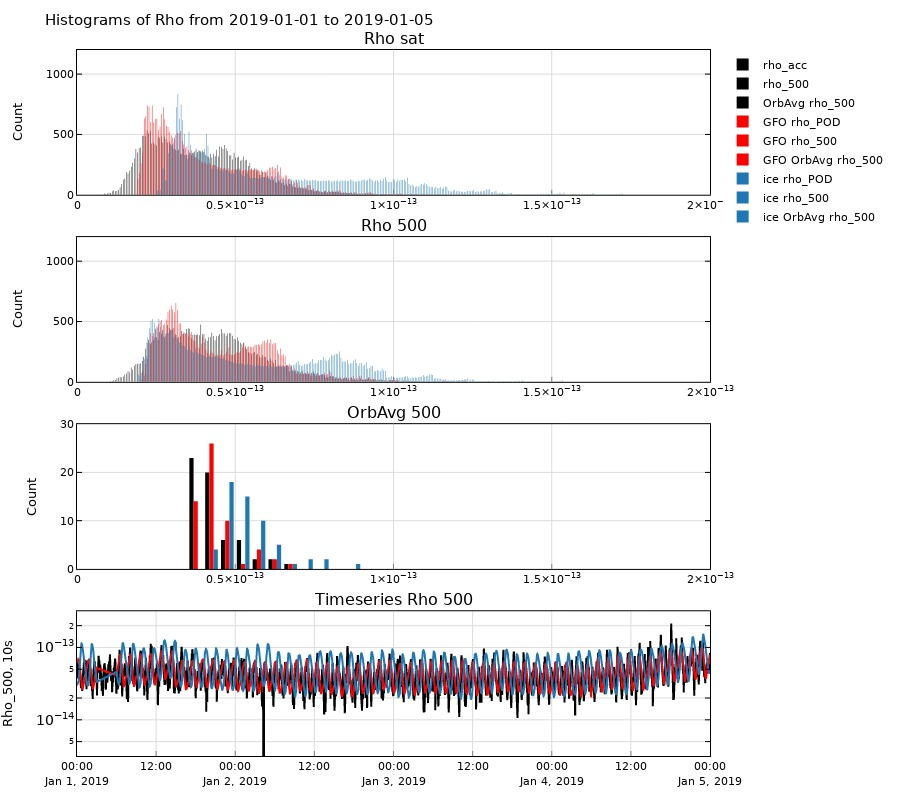

/data/miniconda3/envs/pygeodyn2/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log



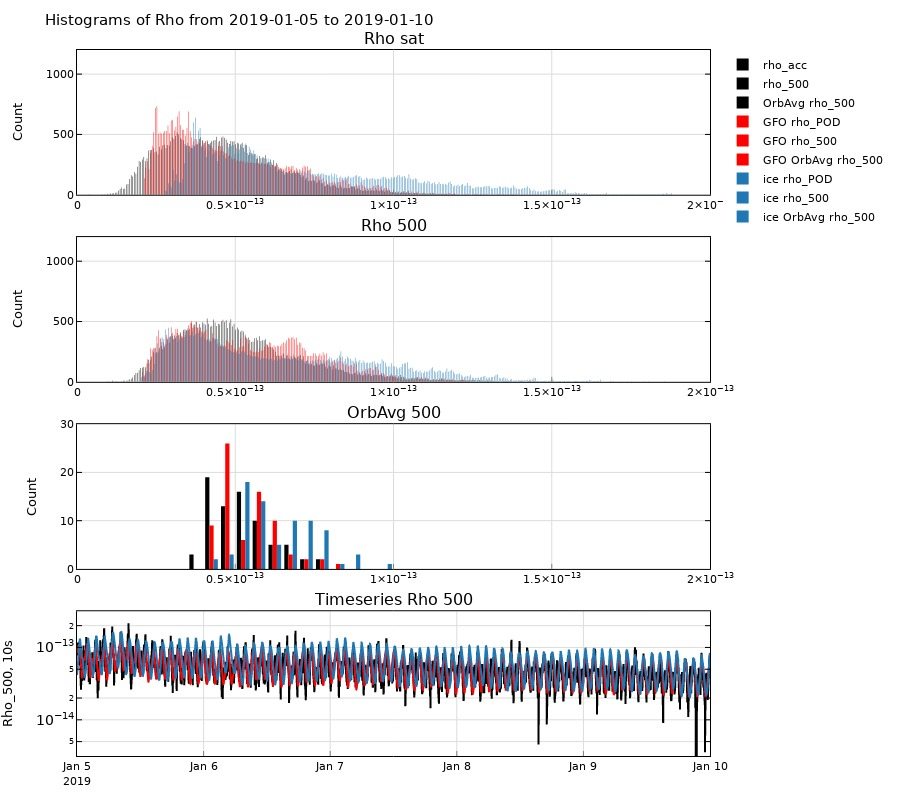

/data/miniconda3/envs/pygeodyn2/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log



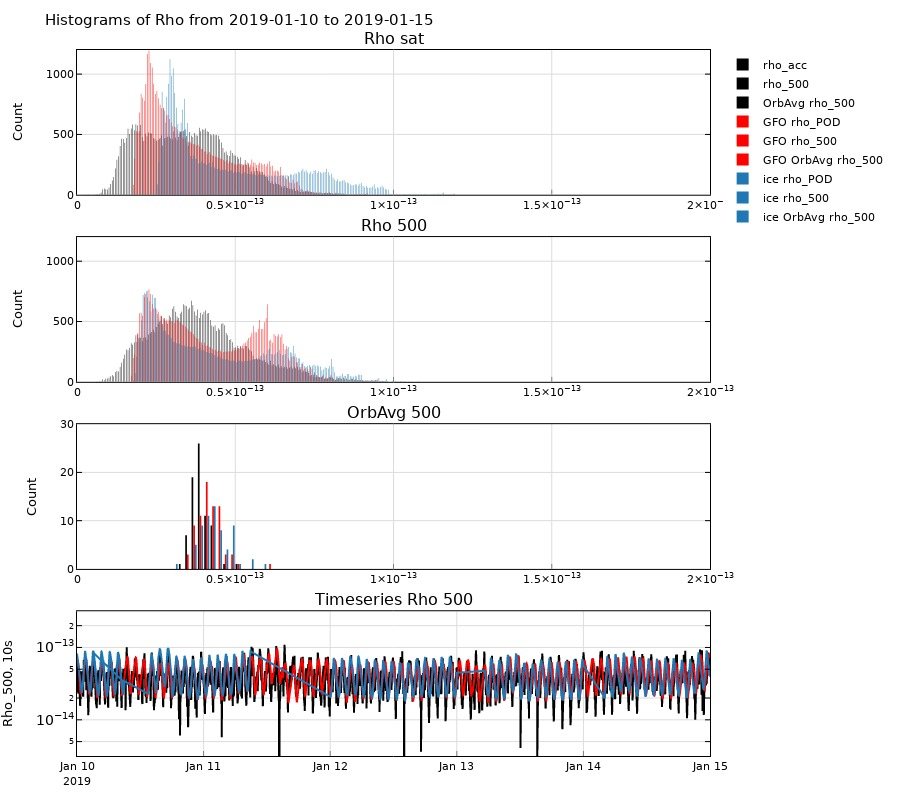

/data/miniconda3/envs/pygeodyn2/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log



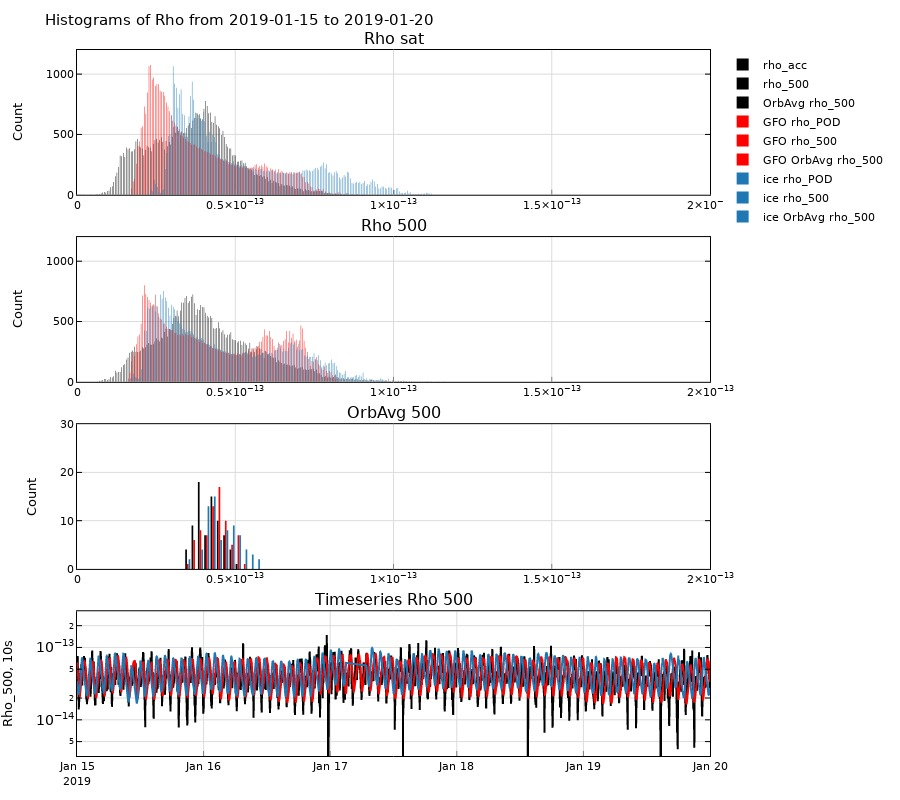

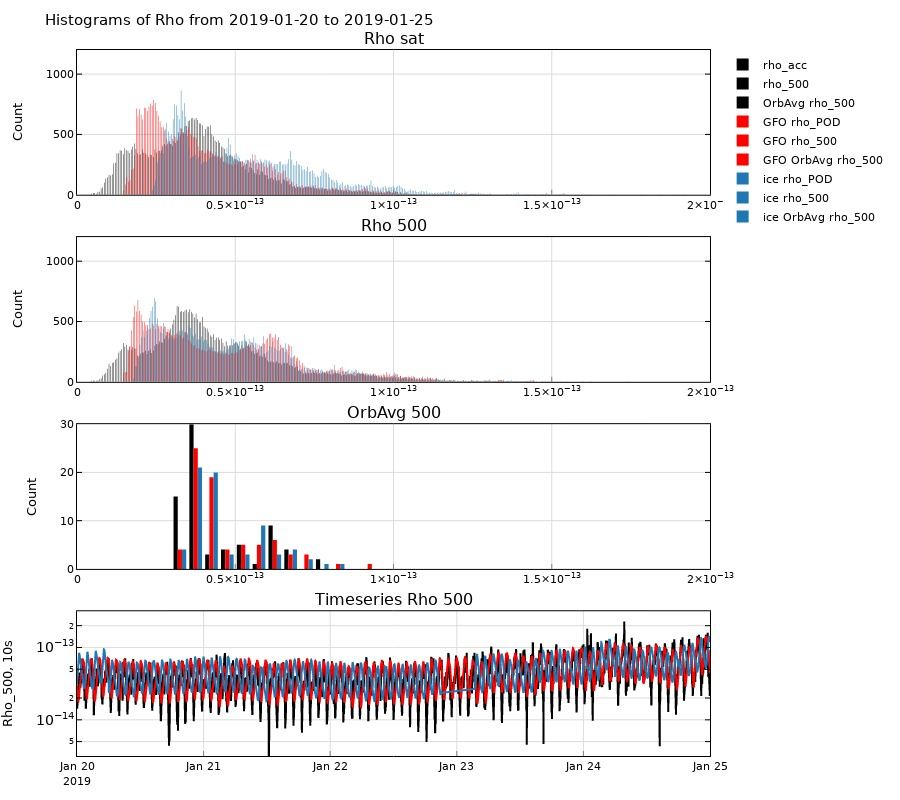

/data/miniconda3/envs/pygeodyn2/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log



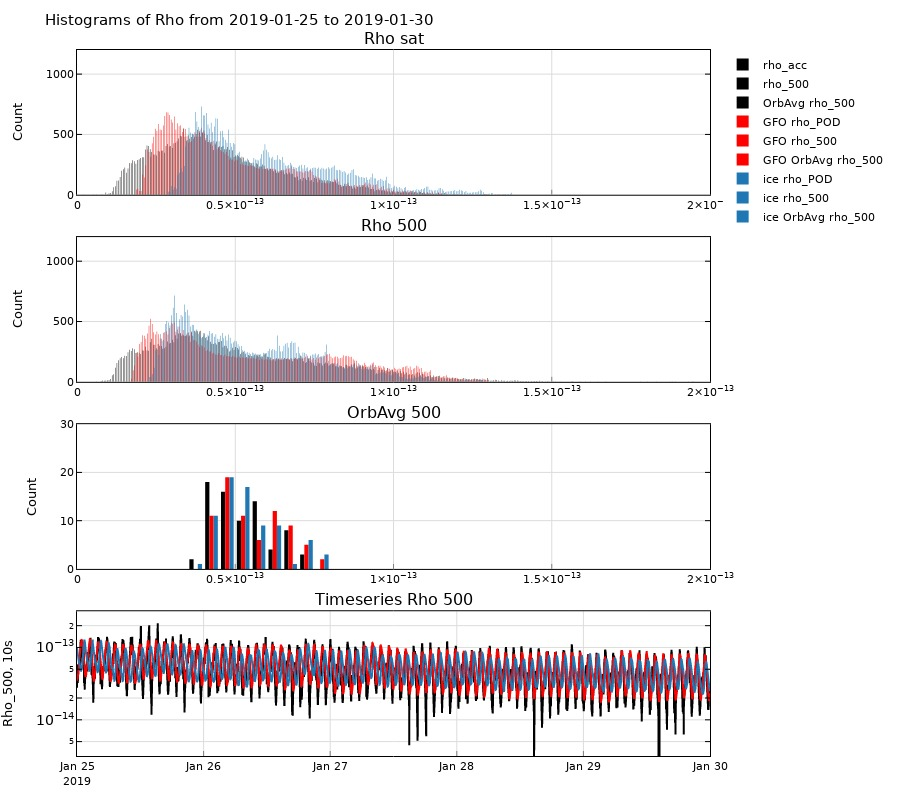

/data/miniconda3/envs/pygeodyn2/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log



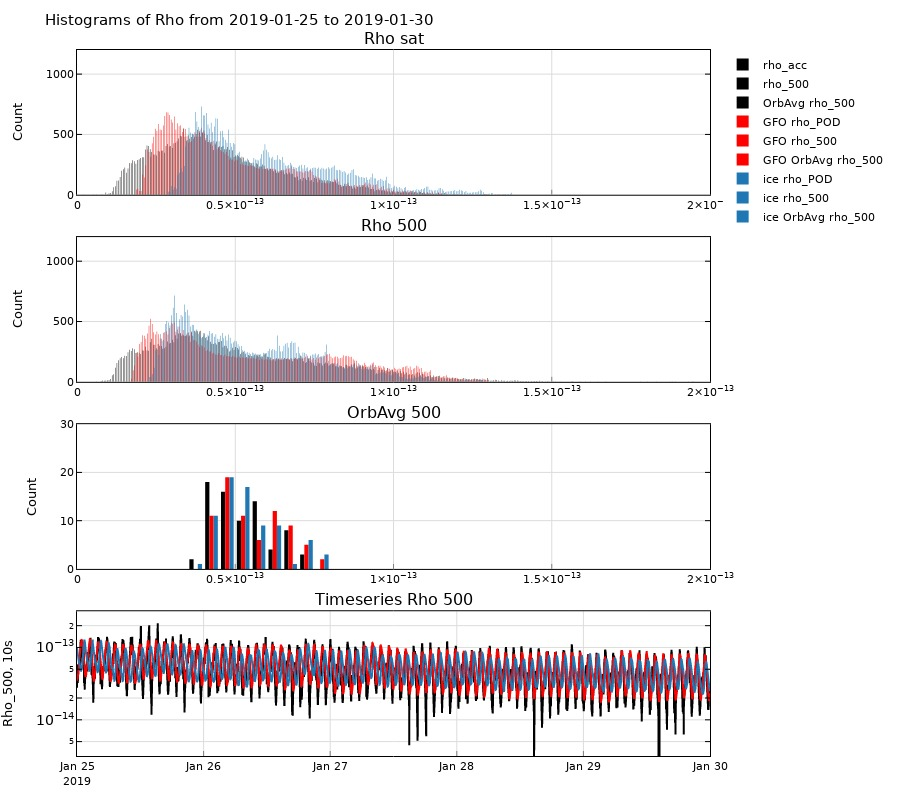

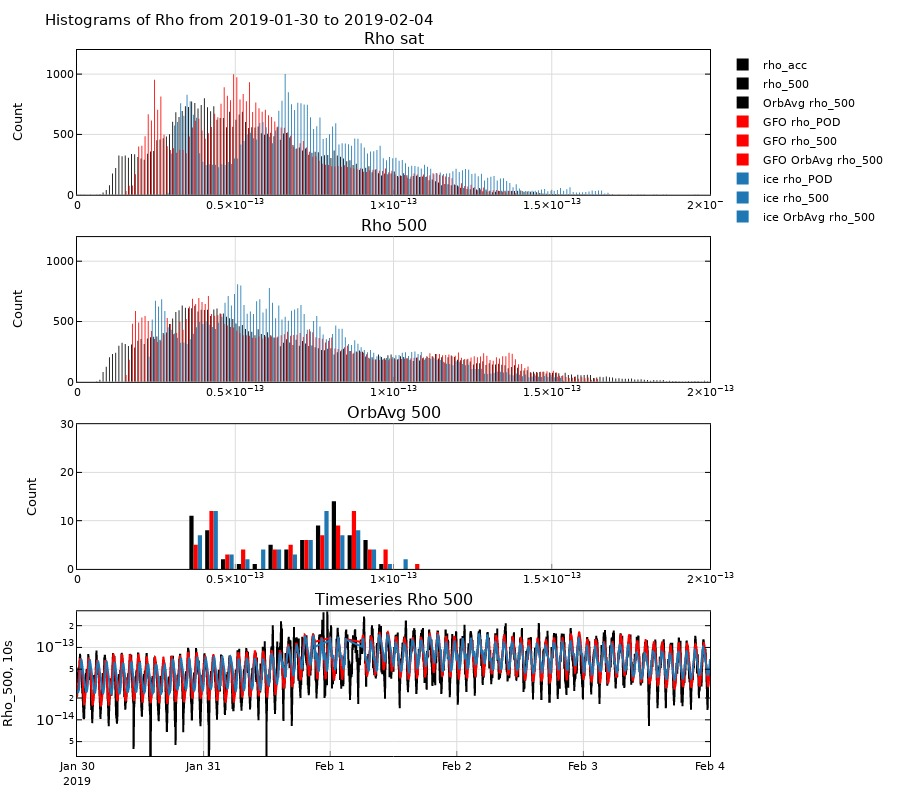

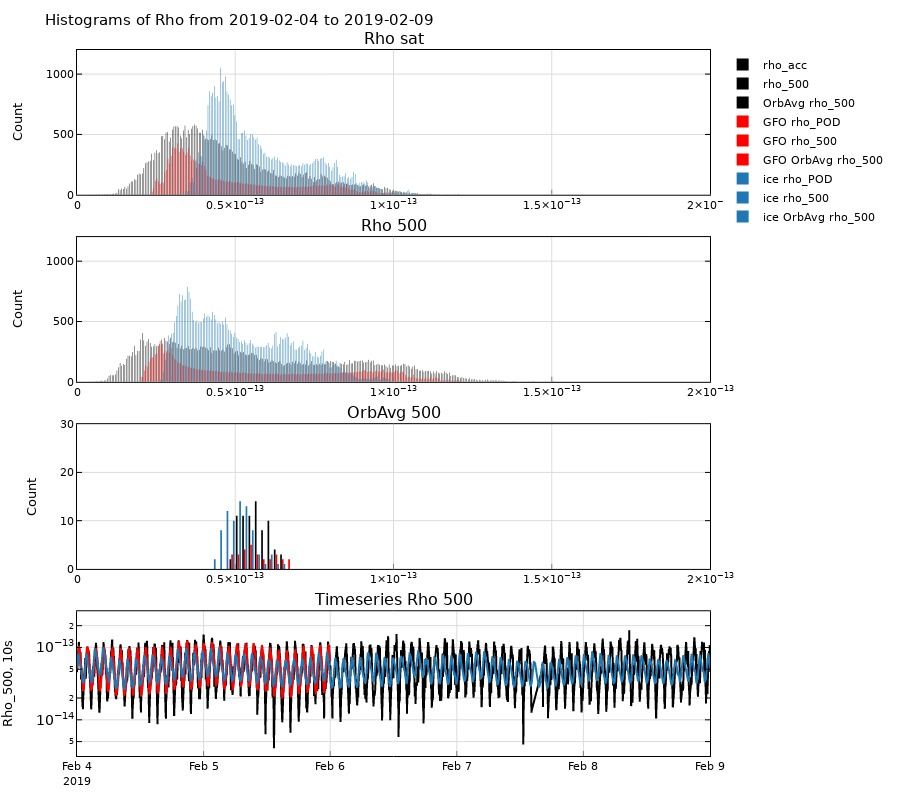

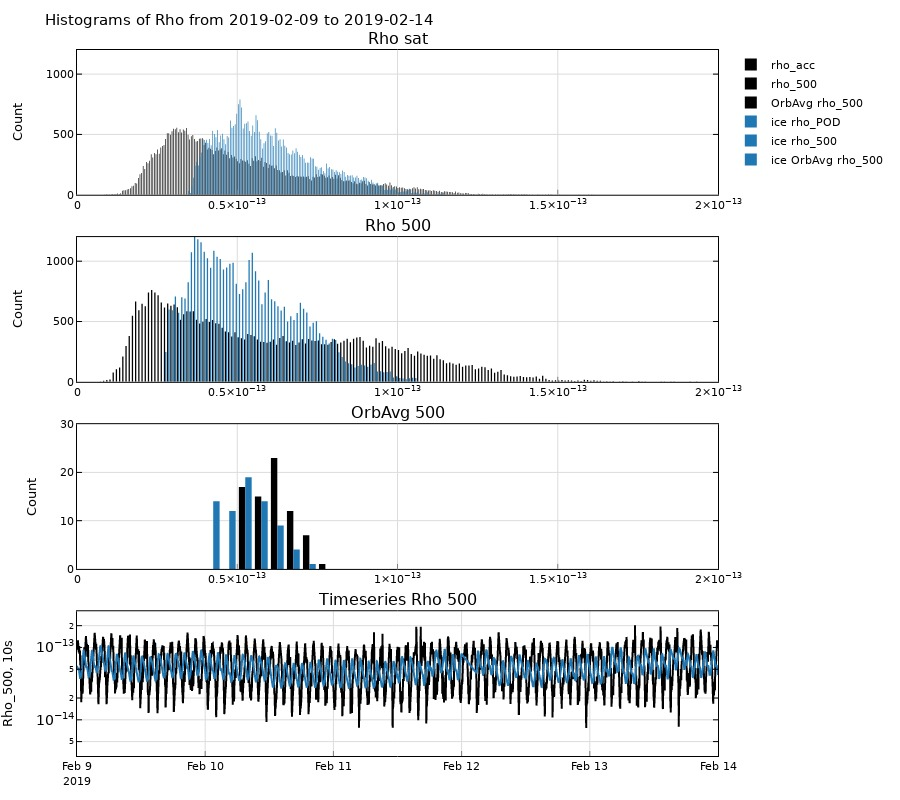

/data/miniconda3/envs/pygeodyn2/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log



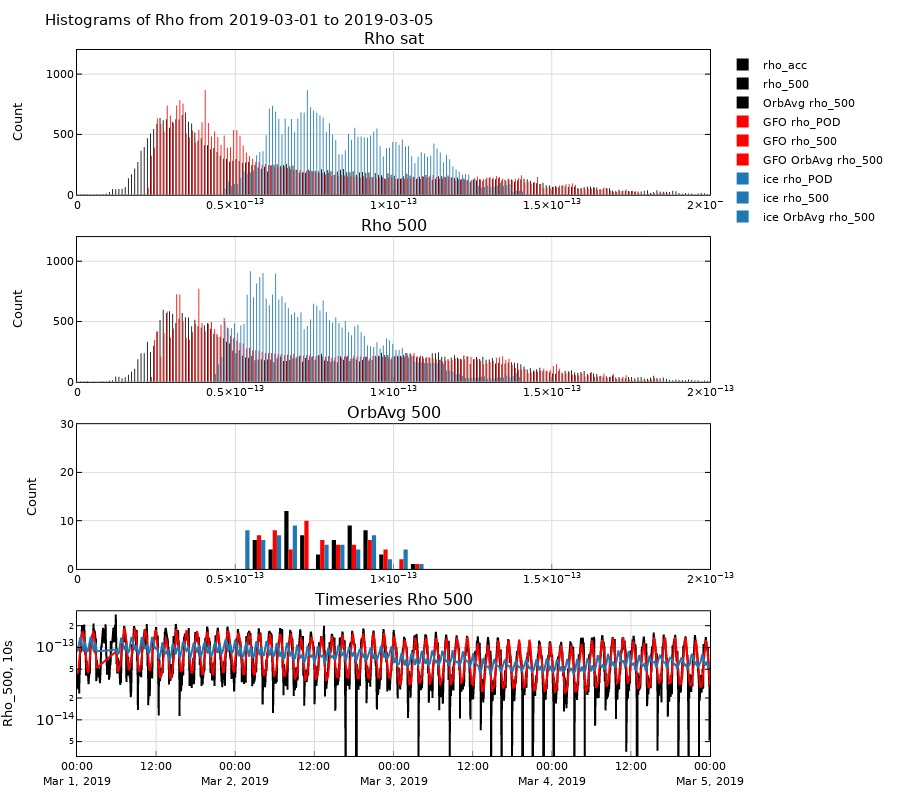

/data/miniconda3/envs/pygeodyn2/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log



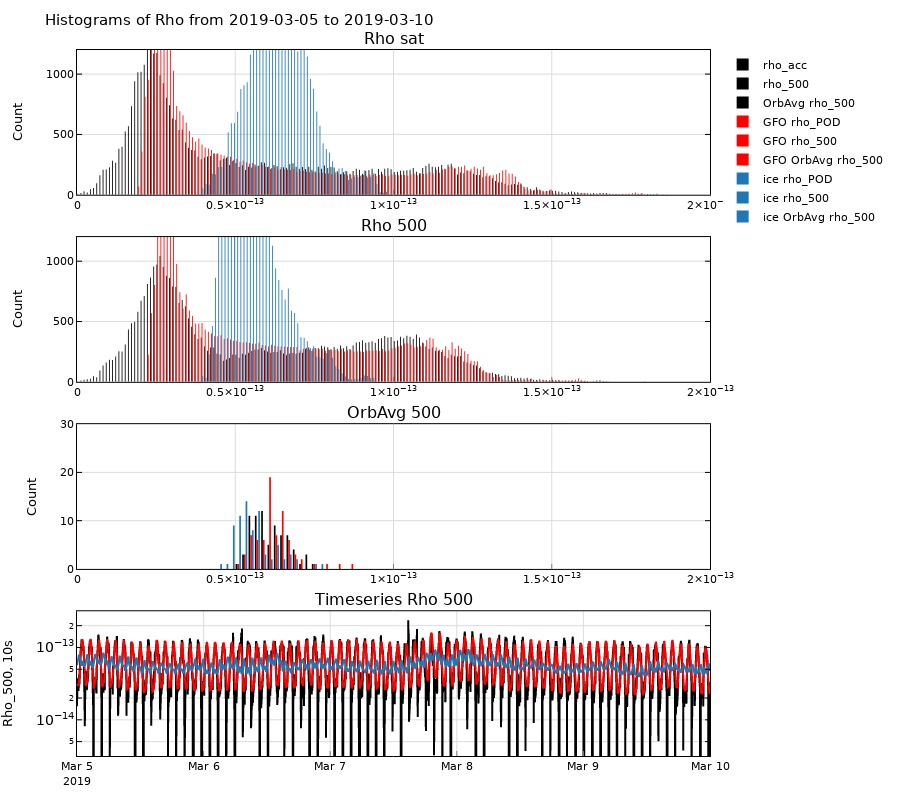

/data/miniconda3/envs/pygeodyn2/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log



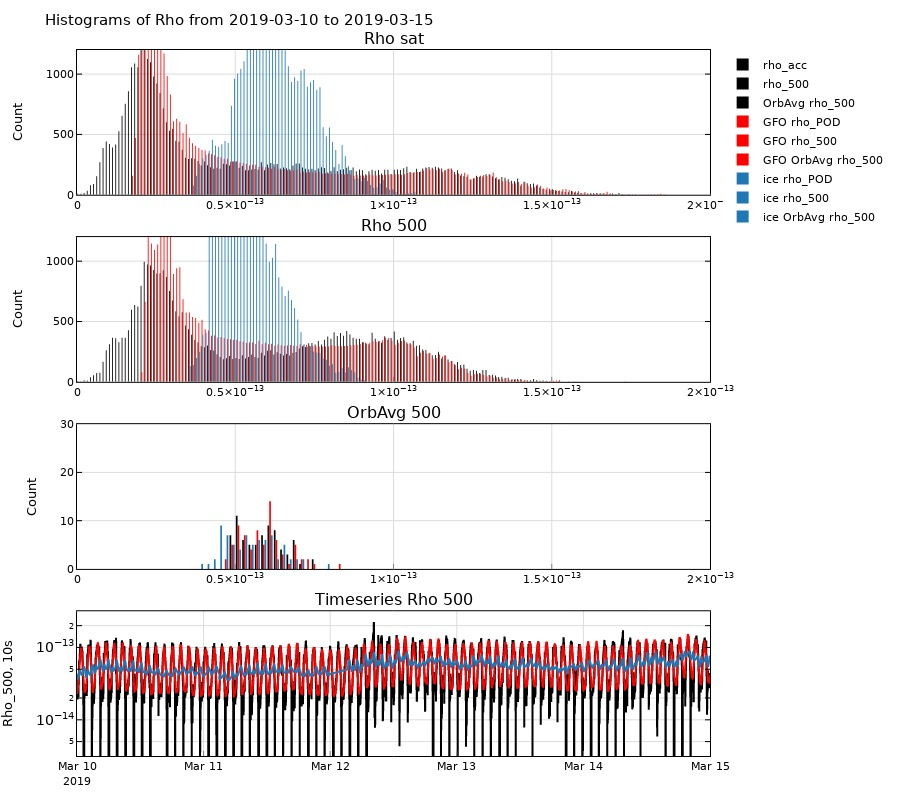

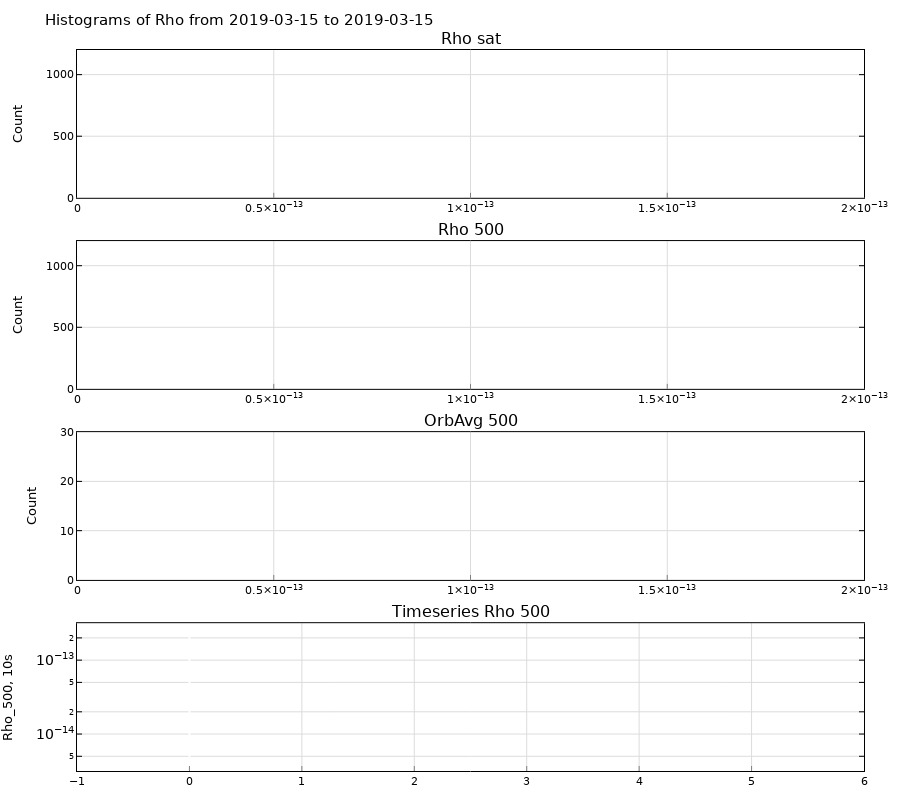

In [8]:
### Airplane -B (start)
# dateStart  = '2019-01-03'
# dateStop   = '2019-01-05'
### Airplane -B (end)
# dateStart  = '2019-02-26'
# dateStop   = '2019-02-28'

### Sailboat -B (start)
# dateStart  = '2019-03-05'
# dateStop   = '2019-03-07'

# ### Sailboat +B (start)
# dateStart  = '2018-10-26'
# dateStop   = '2018-10-28'


dateslist= []

for i,dates in enumerate([['2019-01-01','2019-01-05'],
                         ['2019-01-05','2019-01-10'],
                         ['2019-01-10','2019-01-15'],
                         ['2019-01-15','2019-01-20'],
                         ['2019-01-20','2019-01-25'],
                         ['2019-01-25','2019-01-30'],
                         ['2019-01-25','2019-01-30'],
                         ['2019-01-30','2019-02-04'],
                         ['2019-02-04','2019-02-09'],
                         ['2019-02-09','2019-02-14'],
                        # 
                          ['2019-03-01','2019-03-05'],
                          ['2019-03-05','2019-03-10'],
                          ['2019-03-10','2019-03-15'],
                          ['2019-03-15','2019-03-15'],
                         
                         ]):
    dateStart = dates[0]
    dateStop = dates[1]
    gfo_acc = gfo_acc_df.query(f"Date >= '{dateStart}' and Date < '{dateStop}'")
    gfo_pod = gfo_pod_df.query(f"date >= '{dateStart}' and date < '{dateStop}'")
    ice_pod = ice_pod_df.query(f"date >= '{dateStart}' and date < '{dateStop}'")

    (timeavg_gfo_acc,  denavg_gfo_acc, denstd_gfo_acc)          = orbit_avg_generic(gfo_acc['Date'], gfo_acc['D500_gfo'], gfo_acc['lat'])    
    (logtimeavg_gfo_acc,  logdenavg_gfo_acc, logdenstd_gfo_acc) = orbit_avg_generic(gfo_acc['Date'], np.log(gfo_acc['D500_gfo']), gfo_acc['lat'])    
    denavg_gfo_acc=denavg_gfo_acc[:-1]
    logdenavg_gfo_acc=logdenavg_gfo_acc[:-1]

    (timeavg_gfo_pod,  denavg_gfo_pod, denstd_gfo_pod)          = orbit_avg_generic(gfo_pod['date'], gfo_pod['D500_gfo_pod'], gfo_pod['lat'])    
    (logtimeavg_gfo_pod,  logdenavg_gfo_pod, logdenstd_gfo_pod) = orbit_avg_generic(gfo_pod['date'], np.log(gfo_pod['D500_gfo_pod']), gfo_pod['lat'])    
    denavg_gfo_pod=denavg_gfo_pod[:-1]
    logdenavg_gfo_pod=logdenavg_gfo_pod[:-1]

    (timeavg_ice_pod,  denavg_ice_pod, denstd_ice_pod)          = orbit_avg_generic(ice_pod['date'], ice_pod['D500_ice_pod'], ice_pod['lat'])    
    (logtimeavg_ice_pod,  logdenavg_ice_pod, logdenstd_ice_pod) = orbit_avg_generic(ice_pod['date'], np.log(ice_pod['D500_ice_pod']), ice_pod['lat'])    
    denavg_ice_pod=denavg_ice_pod[:-1]
    logdenavg_ice_pod=logdenavg_ice_pod[:-1]
    
    
    
    ###### PLOT 
    fig = make_subplots(rows=4, cols=1,
                        subplot_titles=("Rho sat","Rho 500", "OrbAvg 500",  "Timeseries Rho 500"),
                               shared_xaxes=True,
                               vertical_spacing=0.06)



    ########################### ACC ########################################

    fig.add_trace(go.Histogram(x=gfo_acc['dens_x'],
#                                nbinsx=100,
                               name='rho_acc',
                               marker_color='black',),
                                row=1, col=1)
    fig.add_trace(go.Histogram(x=gfo_acc['D500_gfo'],#nbinsx=100,
#                               nbinsx=200,
                              name='rho_500',
                             marker_color='black',),
                                row=2, col=1)

    fig.add_trace(go.Histogram(x=denavg_gfo_acc, 
                              name='OrbAvg rho_500',marker_color='black',),
                                row=3, col=1)


    ########################### GFO POD ########################################

    fig.add_trace(go.Histogram(x=gfo_pod['Rho_x'],#nbinsx=100,
                               name='GFO rho_POD',marker_color='red',),
                                row=1, col=1)
    fig.add_trace(go.Histogram(x=gfo_pod['D500_gfo_pod'],#nbinsx=100,
                              name='GFO rho_500',marker_color='red',),
                                row=2, col=1)

    fig.add_trace(go.Histogram(x=denavg_gfo_pod,
                              name='GFO OrbAvg rho_500',marker_color='red',),
                                row=3, col=1)


    ########################### ICE POD ########################################

    fig.add_trace(go.Histogram(x=ice_pod['Rho_x'],#nbinsx=100,
                               name='ice rho_POD',marker_color=icepodcolor,),
                                row=1, col=1)
    fig.add_trace(go.Histogram(x=ice_pod['D500_ice_pod'],#nbinsx=100,
                              name='ice rho_500',marker_color=icepodcolor,),
                                row=2, col=1)

    fig.add_trace(go.Histogram(x=denavg_ice_pod, 
                              name='ice OrbAvg rho_500',marker_color=icepodcolor,),
                                row=3, col=1)
    ########################### Timeseries ########################################


    fig.add_trace(go.Scatter(x=gfo_acc['Date'],
                               y=gfo_acc['D500_gfo'],
    #                            y=gfo_acc['dens_x'],
                              mode='lines',
                            line = dict(color = 'black', width=2),
                               opacity=1,
                               showlegend=False),
                               secondary_y=False,row=4, col=1) 


    fig.add_trace(go.Scatter(x=gfo_pod['date'],
                               y=gfo_pod['D500_gfo_pod'],
    #                            y=gfo_pod['Rho_x'],
                              mode='lines',
                            line = dict(color = 'red', width=2),
                               opacity=1,
                               showlegend=False),
                               secondary_y=False,row=4, col=1) 

    fig.add_trace(go.Scatter(x=ice_pod['date'],
                               y=ice_pod['D500_ice_pod'],
    #                            y=ice_pod['Rho_x'],
                              mode='lines',
                            line = dict(color = icepodcolor, width=2),
                               opacity=1,
                               showlegend=False),
                               secondary_y=False,row=4, col=1) 


    ### SYLIZE LEGEND 
    font_dict=dict(family='Arial',size=11,color='black')
    ## automate the specification of the axes for subplots
    rownum, colnum = fig._get_subplot_rows_columns()
    for i in rownum:
        if len(rownum)==1:
            L_ticklabel = True
        else:
            if i < len(rownum):
                L_ticklabel = False
            else:
                L_ticklabel = True
        fig.update_xaxes(### LINE at axis border
                          showline=True,
                          showticklabels=True,
    #                       tickformat= '%m/%d',
                          linecolor='black',
                          linewidth=1,
                         ### Major ticks
                          ticks='inside',
                          tickfont=font_dict,
                          mirror=True,
    #                       tickwidth=2,
    #                       ticklen=9,
                          tickcolor='grey',
    #                       tick0="2018-11-9" ,
    #                       dtick=86400000.0*1,    # milliseconds in a day, every 7 days
                          #### Minor Ticks
                           minor=dict(
                             dtick=86400000.0, # milliseconds in a day
                             tickwidth=1,
                             ticklen=4,
                             tickcolor='grey',
                             ticks='inside'),
                          ### GRID
                           gridcolor='gainsboro',
                           gridwidth=1,
                           layer='above traces',
                           tickangle=0,
                           row=i, col=1)
        fig.update_yaxes(showline=True,      # add line at x=0
                             showticklabels=True,
                             linecolor='black',  # line color
                             linewidth=1,        # line size
                         ticks='inside',     # ticks outside axis
                         tickfont=font_dict, # tick label font
                         mirror='allticks',  # add ticks to top/right axes
                         tickwidth=1,      # tick width
                         tickcolor='black',  # tick color
                         gridcolor='gainsboro',
                         gridwidth=1,
                         layer='above traces',
                         row=i, col=1)


    fig.update_layout(margin=dict(l=20, r=20, t=50, b=20),)
    # itemsizing='constant'
    fig.update_layout(title=f"Histograms of Rho from {dateStart} to {dateStop}",
                      autosize=False,    width=900,    height=800,
                      legend= {'itemsizing': 'constant'},
                      font=font_dict, plot_bgcolor='white', 
                     )

    
    fig.update_xaxes(exponentformat= 'power',range=[0,2e-13],row=1, col=1)
    fig.update_xaxes(exponentformat= 'power',range=[0,2e-13],row=2, col=1)
    fig.update_xaxes(exponentformat= 'power',range=[0,2e-13],row=3, col=1)

    fig.update_yaxes(title_text="Count", exponentformat= 'power',
                    range=[0,1200],row=1, col=1)
    fig.update_yaxes(title_text="Count", exponentformat= 'power',
                    range=[0,1200],row=2, col=1)
    fig.update_yaxes(title_text="Count", exponentformat= 'power',
                    range=[0,30],row=3, col=1)

    fig.update_yaxes(title_text="Rho_500, 10s", 
                     type="log",exponentformat= 'power',
                    range=[-14.5,-12.5],row=4, col=1)


    fig.update_layout(
        {
            "xaxis": {"matches": None},
            "xaxis2": {"matches": "x", "showticklabels": True},
            "xaxis3": {"matches": "x", "showticklabels": True},
            "xaxis4": {"matches": None},
            "xaxis5": {"matches": 'x4'},
        }
    )

    fig.show(renderer="jpg",config = dict({
                'displayModeBar': False,
                'responsive': False,
                'staticPlot': True,
                'displaylogo': False,
                'showTips': False,
                }))
    pio.write_image(fig, f"histograms/{dateStart}hist.jpg", scale=1)


In [9]:
# np.log(1e-13)

In [10]:
np.log(4.45e-15)

-33.04587229873253

# Plots 

## Histograms

## Rho timeseries

In [11]:
gfo_acc_df.keys()

Index(['Date', 'alt', 'lon', 'lat', 'lst', 'arglat', 'dens_x', 'D500_gfo'], dtype='object')

In [12]:


import plotly.graph_objects as go

import numpy as np

fig = make_subplots(rows=1, cols=1,
                           shared_xaxes=False,
                           vertical_spacing=0.1)



fig.add_trace(go.Scattergl(x=gfo_acc_df['Date'],
                           y=gfo_acc_df['D500_gfo'],
#                            y=gfo_acc_df['dens_x'],
                          mode='markers+lines',
                           marker=dict( size=4, color="black"),
                           opacity=1,
                           showlegend=False),
                           secondary_y=False,row=1, col=1) 


fig.add_trace(go.Scattergl(x=gfo_pod_df['date'],
                           y=gfo_pod_df['D500_gfo_pod'],
#                            y=gfo_pod_df['Rho_x'],
                          mode='markers',
                            marker=dict( size=4, color="red"),
                           opacity=1,
                           showlegend=False),
                           secondary_y=False,row=1, col=1) 

fig.add_trace(go.Scattergl(x=ice_pod_df['date'],
                           y=ice_pod_df['D500_ice_pod'],
#                            y=ice_pod_df['Rho_x'],
                          mode='markers',
                            marker=dict( size=4, color=icepodcolor),
                           opacity=1,
                           showlegend=False),
                           secondary_y=False,row=1, col=1) 

# fig.add_trace(go.Scattergl(x=timeavg_gfo_acc,
#                            y=denavg_gfo_acc,
#                           mode='markers+lines',
#                            marker=dict( size=4, color="black"),
#                            opacity=1,
#                            showlegend=False),
#                            secondary_y=False,row=1, col=1) 


# fig.add_trace(go.Scattergl(x=timeavg_gfo_pod,
#                            y=denavg_gfo_pod,
#                           mode='markers+lines',
#                            marker=dict( size=4, color="red"),
#                            opacity=1,
#                            showlegend=False),
#                            secondary_y=False,row=1, col=1) 

# fig.update_xaxes(range=[pd.to_datetime( "181115-000000", format='%y%m%d-%H%M%S'),
#                         pd.to_datetime( "181116-000000", format='%y%m%d-%H%M%S')],row=1, col=1)

fig.update_yaxes(title_text="Density", 
                 type="linear", exponentformat= 'power')

fig.show()


In [13]:
# import plotly.graph_objects as go

# import numpy as np

# fig = make_subplots(rows=1, cols=1,
# #                     subplot_titles=([]"Rho sat"),
#                            shared_xaxes=True,
#                            vertical_spacing=0.06)



# ########################### ACC ########################################

# fig.add_trace(go.Histogram(x=models_dens['novmsis2']['denscaled'][start:start+end ],
#                            name='msis2',
#                            marker_color=coldict['msis2'],),
#                             row=1, col=1)
# fig.add_trace(go.Histogram(x=models_dens['novdtm2020_o']['denscaled'][start:start+end ],
#                            name='dtm2020',
#                            marker_color=coldict['dtm2020_o'],),
#                             row=1, col=1)
# fig.add_trace(go.Histogram(x=models_dens['novjb2008']['denscaled'][start:start+end ],
#                            name='jb2008',
#                            marker_color=coldict['jb2008'],),
#                             row=1, col=1)
# fig.add_trace(go.Histogram(x=models_dens['novhasdm_oc']['denscaled'][start:start+end ],
#                            name='hasdm',
#                            marker_color=coldict['hasdm_oc'],),
#                             row=1, col=1)
# # fig.add_trace(go.Histogram(x=gfo_acc_df['D500_gfo'],
# #                           name='rho_500',
# #                          marker_color='black',),
# #                             row=2, col=1)

# # fig.add_trace(go.Histogram(x=denavg_gfo_acc,nbinsx=50, 
# #                           name='OrbAvg rho_500',marker_color='black',),
# #                             row=3, col=1)

# # fig.add_trace(go.Histogram(x=np.log(gfo_acc_df['D500_gfo']),
# #                           name='ln(rho_500)',marker_color='black',),
# #                             row=4, col=1)

# # fig.add_trace(go.Histogram(x=logdenavg_gfo_acc,
# #                           name='orbit avg ln(rho_500)',marker_color='black',),
# #                             row=5, col=1)

# # ########################### POD ########################################

# # fig.add_trace(go.Histogram(x=gfo_pod_df['Rho_x'],
# #                            name='rho_POD',marker_color='red',),
# #                             row=1, col=1)
# # fig.add_trace(go.Histogram(x=gfo_pod_df['D500_gfo_pod'],
# #                           name='rho_500',marker_color='red',),
# #                             row=2, col=1)

# # fig.add_trace(go.Histogram(x=denavg_gfo_pod,nbinsx=50, 
# #                           name='OrbAvg rho_500',marker_color='red',),
# #                             row=3, col=1)

# # fig.add_trace(go.Histogram(x=np.log(gfo_pod_df['D500_gfo_pod']),
# #                           name='ln(rho_500)',marker_color='red',),
# #                             row=4, col=1)

# # fig.add_trace(go.Histogram(x=logdenavg_gfo_pod,
# #                           name='orbit avg ln(rho_500)',marker_color='red',),
# #                             row=5, col=1)


# ### SYLIZE LEGEND 
# font_dict=dict(family='Arial',size=11,color='black')
# ## automate the specification of the axes for subplots
# rownum, colnum = fig._get_subplot_rows_columns()
# for i in rownum:
#     if len(rownum)==1:
#         L_ticklabel = True
#     else:
#         if i < len(rownum):
#             L_ticklabel = False
#         else:
#             L_ticklabel = True
#     fig.update_xaxes(### LINE at axis border
#                       showline=True,
#                       showticklabels=True,
# #                       tickformat= '%m/%d',
#                       linecolor='black',
#                       linewidth=1,
#                      ### Major ticks
#                       ticks='inside',
#                       tickfont=font_dict,
#                       mirror=True,
# #                       tickwidth=2,
# #                       ticklen=9,
#                       tickcolor='grey',
# #                       tick0="2018-11-9" ,
# #                       dtick=86400000.0*1,    # milliseconds in a day, every 7 days
#                       #### Minor Ticks
#                        minor=dict(
#                          dtick=86400000.0, # milliseconds in a day
#                          tickwidth=1,
#                          ticklen=4,
#                          tickcolor='grey',
#                          ticks='inside'),
#                       ### GRID
#                        gridcolor='gainsboro',
#                        gridwidth=1,
#                        layer='above traces',
#                        tickangle=0,
#                        row=i, col=1)
#     fig.update_yaxes(showline=True,      # add line at x=0
#                          showticklabels=True,
#                          linecolor='black',  # line color
#                          linewidth=1,        # line size
#                      ticks='inside',     # ticks outside axis
#                      tickfont=font_dict, # tick label font
#                      mirror='allticks',  # add ticks to top/right axes
#                      tickwidth=1,      # tick width
#                      tickcolor='black',  # tick color
#                      gridcolor='gainsboro',
#                      gridwidth=1,
#                      layer='above traces',
#                      row=i, col=1)


# fig.update_layout(margin=dict(l=20, r=20, t=40, b=20),)
# # itemsizing='constant'
# fig.update_layout(title=f"Histograms of 1 day of Model Densities",
#                   autosize=True,#    width=900,    height=800,
#                   legend= {'itemsizing': 'constant'},
#                   font=font_dict, plot_bgcolor='white', 
#                  )

# fig.update_xaxes(title_text="Density", 
#                  exponentformat= 'power',
#                 row=5, col=1)
# fig.update_xaxes(exponentformat= 'power',row=1, col=1)
# # fig.update_xaxes(exponentformat= 'power',row=2, col=1)
# # fig.update_xaxes(exponentformat= 'power',row=3, col=1)
# # fig.update_xaxes(exponentformat= 'power',row=4, col=1)

# fig.update_yaxes(title_text="Count", 
# #                  type="log", 
#                  exponentformat= 'power')


# fig.update_layout(
#     {
#         "xaxis": {"matches": None},
#         "xaxis2": {"matches": "x", "showticklabels": True},
#         "xaxis3": {"matches": "x", "showticklabels": True},
#         "xaxis4": {"matches": None},
#         "xaxis5": {"matches": 'x4'},
#     }
# )

# fig.show()


## Std Dev of Orbit Avg.

In [14]:

# gfo_acc_df = gfo_acc_df.query("Date >= '2018-11-01' and Date < '2018-11-07'")
# # gfo_acc_df = gfo_acc_df.query("Date >= '2018-10-25' and Date < '2019-04-25'")

# def orbit_avg_generic(Dates, rho, Lats ):
#     lat     = np.asarray(Lats[:])
#     time_pd = pd.to_datetime(Dates[:])

#     # identify ascending equatorial pass as start of orbit
#     a     = np.logical_and( lat[1:]*lat[0:-1]  < 0 , lat[1:] > lat[0:-1] )
#     tup_i = a.ravel().nonzero( )
#     i     = np.squeeze(tup_i)
    
#     # initialize arrays
#     d_avg      = np.zeros(np.size(i))
#     stddev     = np.zeros(np.size(i))
#     time_avg   = []  
#     for j in range(np.size(i)-1):
#         # average density over orbital passes
#         d_avg[j]      = np.mean(rho[i[j] : i[j+1]-1  ]  )

#         ## Std Deviation
#         stddev[j]      = np.std(rho[i[j] : i[j+1]-1  ]  )

#         # average dates
#         # t1 = pd.to_datetime(time_pd[ i[j]    ])
#         # t2 = pd.to_datetime(time_pd[ i[j+1]-1])
#         t1 = pd.to_datetime(time_pd.values[ i[j]    ])
#         t2 = pd.to_datetime(time_pd.values[ i[j+1]-1])
#         datemiddle = pd.Timestamp(t1) + (pd.Timestamp(t2) - pd.Timestamp(t1)) / 2
#         time_avg.append(datemiddle)
        
#     return(time_avg, d_avg , stddev)

# (timeavg_gfo_acc,  denavg_gfo_acc, denstd_gfo_acc) = orbit_avg_generic(gfo_acc_df['Date'], gfo_acc_df['D500_gfo'], gfo_acc_df['lat'])    



# # fig = make_subplots(rows=1, cols=1)
# fig = make_subplots(rows=1, cols=1, #],
#                     specs=[[{"secondary_y": False}],
# #                            [{"secondary_y": False}],
# #                            [{"secondary_y": False}],
# #                            [{"secondary_y": False}],
#                            ],
#                            shared_xaxes=True,
#                            vertical_spacing=0.02)

# fig.add_trace(go.Scattergl( x= gfo_acc_df['Date'],
#                             y= gfo_acc_df['D500_gfo'],
#                             name=f'10s Cadence Density',
#                             mode='markers',
#                             opacity=0.5,
#                             marker=dict( size=2, color="#d62728" ),
#                             showlegend=True),
#                             row=1, col=1)


# fig.add_trace(go.Scattergl( x= timeavg_gfo_acc,
#                             y=denavg_gfo_acc,
#                             name=f'Orb Avg Density',
#                             mode='markers+lines',
#                             opacity=1,
#                             line=dict(width=1),
#                             marker=dict( size=4, color="black" ),
#                             showlegend=True),
#                             row=1, col=1)


# fig.add_traces(go.Scatter(x=timeavg_gfo_acc,
#                             y=denavg_gfo_acc+denstd_gfo_acc,
#                             name='1 Std Deviation',
#                             marker=dict(color="#444"),
#                             line=dict(width=0.05),
#                             mode='lines',
#                             fillcolor='rgba(68, 68, 68, 0.3)',
#                             showlegend=True,
#                             ))
# fig.add_traces(go.Scatter(x=timeavg_gfo_acc,
#                             y=denavg_gfo_acc-denstd_gfo_acc,
#                             marker=dict(color="#444"),
#                             line=dict(width=0),
#                             mode='lines',
#                             fillcolor='rgba(68, 68, 68, 0.3)',
#                             fill='tonexty',
#                             showlegend=False,
#                             ))




# #### FANCY LEGEND ################################################################

# ### SYLIZE LEGEND 
# font_dict=dict(family='Arial',size=11,color='black')
# ## automate the specification of the axes for subplots
# rownum, colnum = fig._get_subplot_rows_columns()
# for i in rownum:
#     if len(rownum)==1:
#         L_ticklabel = True
#     else:
#         if i < len(rownum):
#             L_ticklabel = False
#         else:
#             L_ticklabel = True
#     fig.update_xaxes(### LINE at axis border
#                       showline=True,
#                       showticklabels=L_ticklabel,
# #                       tickformat= '%m/%d',
#                       linecolor='black',
#                       linewidth=1,
#                      ### Major ticks
#                       ticks='inside',
#                       tickfont=font_dict,
#                       mirror=True,
# #                       tickwidth=2,
# #                       ticklen=9,
#                       tickcolor='grey',
# #                       tick0="2018-11-9" ,
# #                       dtick=86400000.0*1,    # milliseconds in a day, every 7 days
#                       #### Minor Ticks
#                        minor=dict(
#                          dtick=86400000.0, # milliseconds in a day
#                          tickwidth=1,
#                          ticklen=4,
#                          tickcolor='grey',
#                          ticks='inside'),
#                       ### GRID
#                        gridcolor='gainsboro',
#                        gridwidth=1,
#                        layer='above traces',
#                        tickangle=0,
#                        row=i, col=1)
#     fig.update_yaxes(showline=True,      # add line at x=0
#                          showticklabels=True,
#                          linecolor='black',  # line color
#                          linewidth=1,        # line size
#                      ticks='inside',     # ticks outside axis
#                      tickfont=font_dict, # tick label font
#                      mirror='allticks',  # add ticks to top/right axes
#                      tickwidth=1,      # tick width
#                      tickcolor='black',  # tick color
#                      gridcolor='gainsboro',
#                      gridwidth=1,
#                      layer='above traces',
#                      row=i, col=1)

# fig.update_yaxes(title_text="Orbit Avergaed Density", 
#                  type="log", 
#                  exponentformat= 'power',row=1, col=1)

# fig.update_yaxes(title_text="Std Dev", 
#                 minor=dict(dtick=10, tickwidth=1,ticklen=4,tickcolor='grey',ticks='inside'),
#                  exponentformat= 'power',row=2, col=1)

# fig.update_layout(margin=dict(l=20, r=20, t=30, b=20),)
# # itemsizing='constant'
# fig.update_layout(title=f"GFO Accelerometer Density, Norm. to 500km",
#                   autosize=False,    width=1000,    height=500,
#                   legend= {'itemsizing': 'constant'},
#                   font=font_dict, plot_bgcolor='white', 
#                  )

# fig.show(config=config)

# # pio.write_image(fig, 'ICEvGFO.jpg', scale=5)
